<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px;"> 
# Introduction to Pandas and Matplotlib

---
Week 1 | Lesson 1.10

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand and demonstrate how to create a dataframe
- Understand and demonstrate how to use dataframe methods (unique, describe)
- Understand and demonstrate how to plot a graph in matplotlib (plot, hist, scatter)


### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Understand and write basic python syntax
- Understand and minipulate list data objects


## Introduction 

![](http://upload-images.jianshu.io/upload_images/2422746-4ff5bbb54dfd9552.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

Pandas is a powerful and versatile scientific computing package. With Pandas you can load data, structure it, transform it in many different ways, and plot it. Pandas is an excellent Exploratory Data Analysis (EDA) tool that is very common in industry and as a must have skill on job applications for data science roles. 

The main data object in Pandas is called a dataframe. A dataframe is like an excell table with super and easy to use analytics powers. In this lesson, we will introduce some basic pandas operations in order to get a familarity with minipulating dataframe. In week 3, we'll dive deeper in pandas and play around with some of its cooler tricks for data minipulation and analysis. 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Loading DAta

Pandas has methods for load data that are stored in different formats. 


In [50]:
# bring the curser to the end of the code and press tab to view all available read methods 
pd.read

AttributeError: 'module' object has no attribute 'read'

In [59]:
# load data
data_path = "/Users/lana/Desktop/DSI-SF-5/datasets/churn.csv"
df = pd.read_csv(data_path)

Panda also has methods for printing out a small subset of data. 

**head** prints out the first 5 lines of the dataframe

**tail** prints out the last 5 lines of the dataframe

In [60]:
# Print the head
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [53]:
# print out the list of columns 
df.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

##  Features

Sometimes we are interested in a subset of features for analysis. We can include a subset of features in a list and pass that list into the dataframe. 

Let's remove features that we can't do any data analysis on, like Account Length, Area Code, and Phone.

In [54]:
# since the columns print out is small enough, we can copy and paste it here and remove the 3 unwanted features 
keep_cols = \
[u'State',  u"Int'l Plan",
u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
u'Intl Charge', u'CustServ Calls', u'Churn?']

In [55]:
df = df[keep_cols]

In [13]:
df.head()

,State,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
# Print the unique states and how many there are
df.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
# count of unique states
df.State.unique().shape

(51,)

Next let's create a second dataframe that only has the minutes features

In [16]:
# Make a dataframe of states  and the minutes categories 
col_mins = ["State", "Day Mins", "Eve Mins", "Night Mins", "Intl Mins"]
df_minutes = df[col_mins]

In [17]:
df_minutes.head()

,State,Day Mins,Eve Mins,Night Mins,Intl Mins
0,KS,265.1,197.4,244.7,10.0
1,OH,161.6,195.5,254.4,13.7
2,NJ,243.4,121.2,162.6,12.2
3,OH,299.4,61.9,196.9,6.6
4,OK,166.7,148.3,186.9,10.1


In [38]:
# Make a dataframe of states and international features
cols_chare = ["State", "Day Charge", "Eve Charge", "Night Charge", "Intl Charge"]
df_charge = df[cols_chare]

In [39]:
df_charge.head()

,State,Day Charge,Eve Charge,Night Charge,Intl Charge
0,KS,45.07,16.78,11.01,2.70
1,OH,27.47,16.62,11.45,3.70
2,NJ,41.38,10.30,7.32,3.29
3,OH,50.90,5.26,8.86,1.78
4,OK,28.34,12.61,8.41,2.73


## You Try

Make a dataframe consisting of the state and all call features. Name it **df_calls**

In [32]:
# write your code here
cols_calls = ["State", "Day Calls", "Eve Calls", "Night Calls", "Intl Calls"]
df_calls = df[cols_calls]
df_calls.head()

,State,Day Calls,Eve Calls,Night Calls,Intl Calls
0,KS,110,99,91,3
1,OH,123,103,103,3
2,NJ,114,110,104,5
3,OH,71,88,89,7
4,OK,113,122,121,3


## Basic Statistics

There are better python packages for statistical analysis than pandas. For instance, when we properly cover statistics we'll explore a statistical package called statsmodels. But pandas is sutiable for basic descriptive statistics. 

**describe** is pandas method that provdies a short statistical summery of the data. This is pretty useful for a first pass at the data. 

Notice how most of the features fall in 1 of 3 categories: minutes, calls, and chages. As a results, it is a bit distracting to look at all 3 different features in one tables, since each category will have behavior that is characteristic of its self. 

In [33]:
df.describe()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Let's look at the minutes statistical summery. Notice how the day, evening, and night means are about the same and the standard deviations are nearly identical as well. Yet, the typical amount of international minutes used is small in comparison. 

In [34]:
df_minutes.describe()

,Day Mins,Eve Mins,Night Mins,Intl Mins
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,200.980348,200.872037,10.237294
std,54.467389,50.713844,50.573847,2.791840
min,0.000000,0.000000,23.200000,0.000000
25%,143.700000,166.600000,167.000000,8.500000
50%,179.400000,201.400000,201.200000,10.300000
75%,216.400000,235.300000,235.300000,12.100000
max,350.800000,363.700000,395.000000,20.000000


Let's look at the charge dataframe. The typical charge is different for feature also the maximum charge that a user was billed is highest for day and lowest for international. 

In [40]:
df_charge.describe()

,Day Charge,Eve Charge,Night Charge,Intl Charge
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,30.562307,17.083540,9.039325,2.764581
std,9.259435,4.310668,2.275873,0.753773
min,0.000000,0.000000,1.040000,0.000000
25%,24.430000,14.160000,7.520000,2.300000
50%,30.500000,17.120000,9.050000,2.780000
75%,36.790000,20.000000,10.590000,3.270000
max,59.640000,30.910000,17.770000,5.400000


## You Try

Call the describe method on **df_calls** and comment on the means. 

In [41]:
# write your code here
df_calls.describe()

,Day Calls,Eve Calls,Night Calls,Intl Calls
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.435644,100.114311,100.107711,4.479448
std,20.069084,19.922625,19.568609,2.461214
min,0.000000,0.000000,33.000000,0.000000
25%,87.000000,87.000000,87.000000,3.000000
50%,101.000000,100.000000,100.000000,4.000000
75%,114.000000,114.000000,113.000000,6.000000
max,165.000000,170.000000,175.000000,20.000000


## Basic Data Visualizations

Pandas' plotting capabilities are built on top of matplotlib (which we'll cover in a bit). Although the plots that Pandas generates wont dazzel any eyes, they are insightful and easy to use. Which makes them great tools to use during Exploratory Data Analysis (EDA).

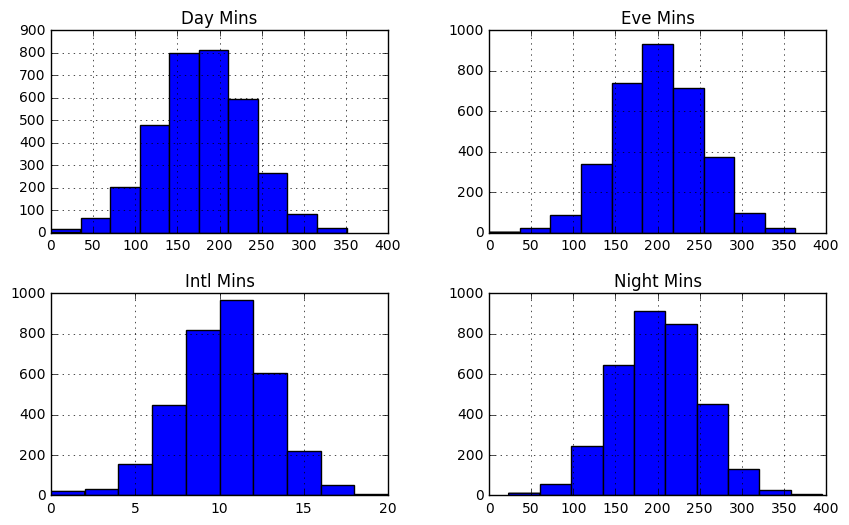

In [46]:
# Plot histograms of the minutes features
df_minutes.hist(figsize=(10,6));

#### Comments
Just as we saw in the statistical summery, the typical amount of minutes used through out the day is about the same, the standard deviations are also similar. 

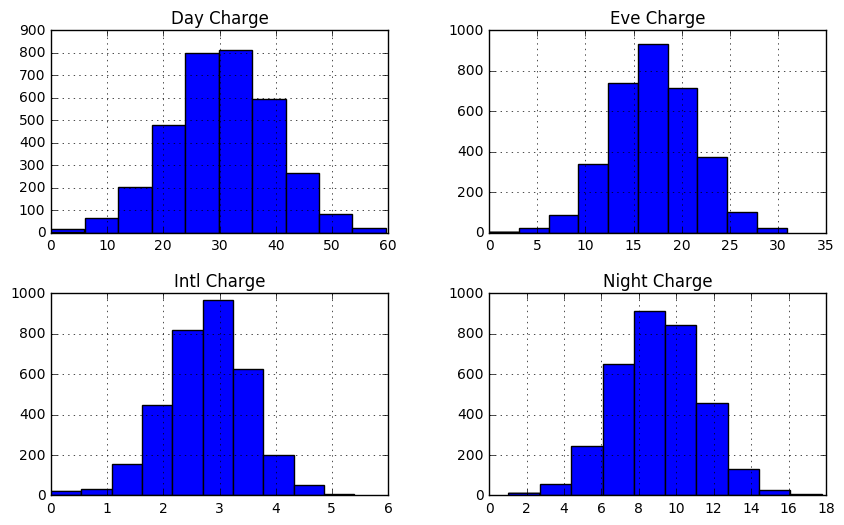

In [48]:
df_charge.hist(figsize=(10,6));

### Comments

Just as we saw in the statistical summery, the typical charge varies between day, evening, and international calls. These plots show that users are typically charged more for day and evening calls than they are for international calls. Which makes sense since very few minutes are used for international calls. 

## You Try

Plot histograms of the **df_calls** datafarme. Add a comment below. Does the plot agree with your assessment of the statistical summery?

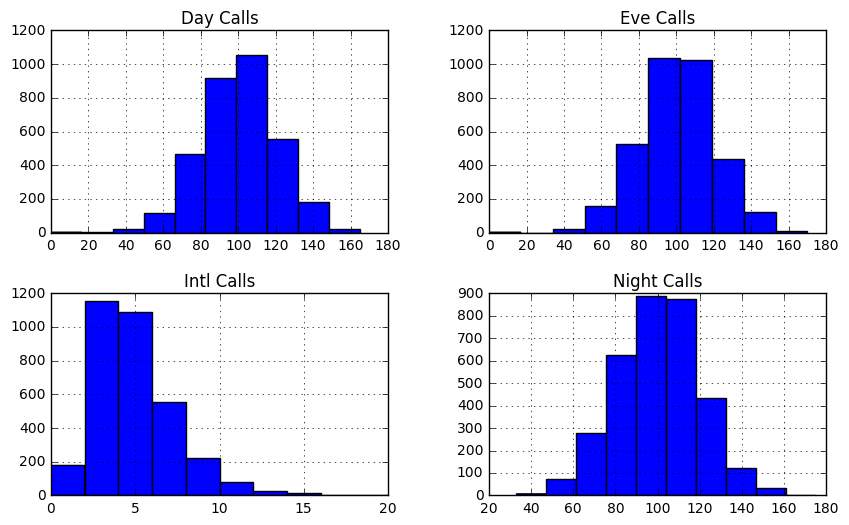

In [49]:
# write your code here
df_calls.hist(figsize=(10,6));

#### Comment

Write your comment here

## Pandas Lab

See notebook labeled Pandas Lab.

## Intro to Matplotlib

![](http://img.my.csdn.net/uploads/201212/08/1354943250_4164.png)

Matplotlib is a common ploting package that data scientist use to make exploratory plots of their data. The good thing about Matplotlib is that it is highly customizable. The catch is that, well, we need to specify every little detail of the plot, unlike Pandas Matplotlib will not infer a title for you. 

Also there are more sophistacated ploting libraries like [Seaborn](http://seaborn.pydata.org/) and [BoKeh](http://bokeh.pydata.org/en/latest/), but they are both build on Matplotlib - so we need to learn the fundamentals. 

Let's run through some examples in order to understand some of matplotlib's basic features. 

The main figures that you'l likely use in matplotlib are the plot, hist, and scatter. There are other types of figures -- bar charts, contour maps, image show -- but these three tend to be the most common.  

## Pyplot

Pyplot is a subclass of Matplotlib that is full of useful ploting methods and options for customizing them. The documentation for pyplot can be found.

It is strongly encouraged for one to familiarize themselves with the [ pyplot official documentaions](http://matplotlib.org/api/pyplot_api.html) when custumizing plots. The Jupyter notebook documenation of pyplot lacks clarity. 

In [56]:
plt.plot?

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot

The **plot** method can take at most two data objects (i.e. X, Y).

In [64]:
data_path = "/Users/lana/Desktop/DSI-SF-5/datasets/birth_data.txt"
births = pd.read_csv(data_path).values

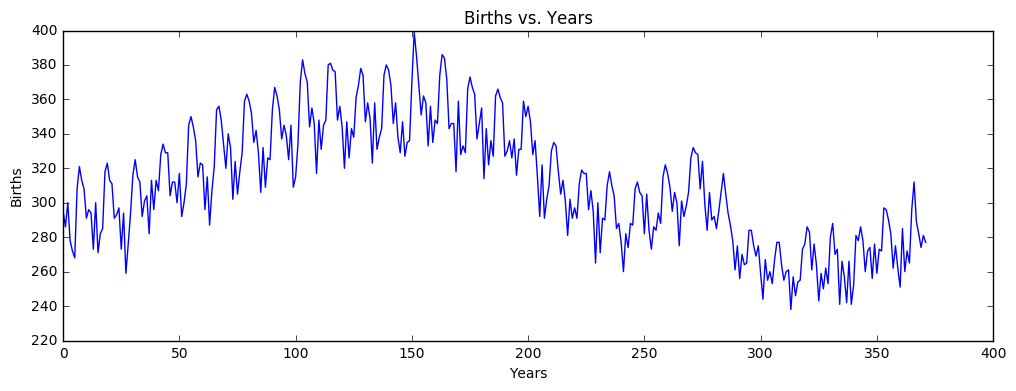

In [65]:
# adjust figure size
plt.figure(figsize=(12,4))

# plot the data
plt.plot(births);

# label the plot
plt.title("Births vs. Years");
plt.ylabel("Births")
plt.xlabel("Years");

You can also change the color and the shape of each data point. The default option is blue and to connect each data point with lines. 

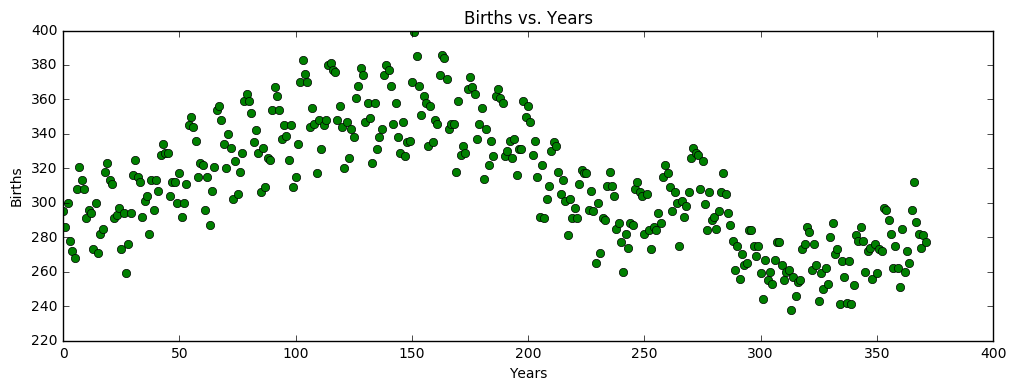

In [66]:
# adjust figure size
plt.figure(figsize=(12,4))

# plot the data
plt.plot(births, 'go');

# label the plot
plt.title("Births vs. Years");
plt.ylabel("Births")
plt.xlabel("Years");

## Histogram

Are great plots for showing the distribution of a data set. 

In [67]:
day_charges = df_charge["Day Charge"].values
intl_charges = df_charge["Intl Charge"].values

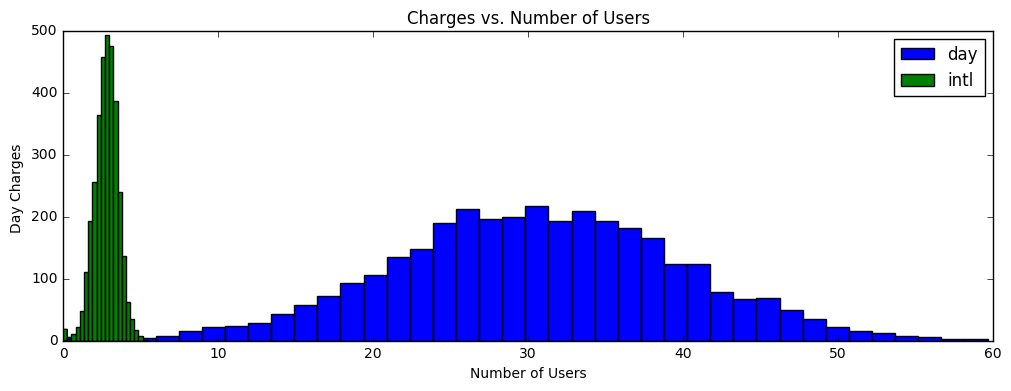

In [68]:
# adjust figure size
plt.figure(figsize=(12,4))

# plot histograms with specified options
plt.hist(day_charges, bins = 40, label = "day");
plt.hist(intl_charges, bins = 20, label = 'intl');

# label the plot
plt.title("Charges vs. Number of Users");
plt.ylabel("Day Charges ")
plt.xlabel("Number of Users");

# plot the legend to distinguish between populations
plt.legend();

## Scatter 

Scatter plots are usefull for data sets that should not be connected by lines, for instance cluster. 

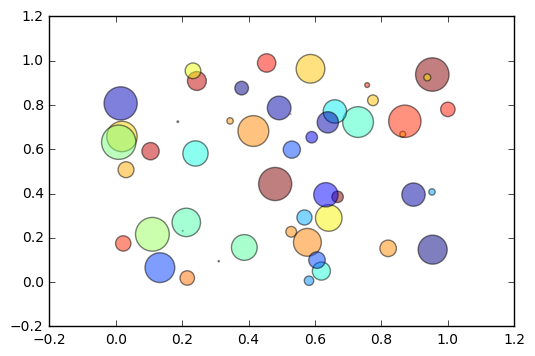

In [69]:
# number of points
N = 50

# generate random points
x = np.random.rand(N)
y = np.random.rand(N)

# get random numbers for colors
colors = np.random.rand(N)

# randomly generate the size of the area (A = pi * R^2)
area =  np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

# scatter plot the data with specified options 
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# Lab

For this lab you will be given two data sets. The first is the customer churn data set that we looked through in the Pandas lecture. The second data set is on financial earnings. 

### Exercise One

Use Matplotlib to visualize the **CustServ Calls** feature. It's up to you to decided which of the 3 methods of visualization -- plot, hist, scatter -- is appropriate for this feature. 

Make sure to provide appropriate labels for your visualization and justify your choice of visualization. 

In [70]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


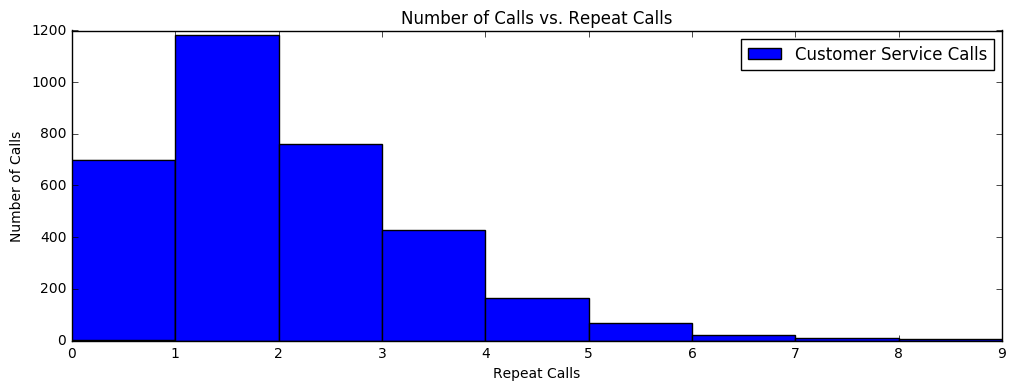

In [80]:
# your code goes here here
cust_serv_calls = df['CustServ Calls'].values

# adjust figure size
plt.figure(figsize=(12,4))

# plot histograms with specified options
plt.hist(cust_serv_calls, bins = 9, label = "Customer Service Calls")

# label the plot
plt.title("Number of Calls vs. Repeat Calls")
plt.ylabel("Number of Calls")
plt.xlabel("Repeat Calls")

# plot the legend to distinguish between populations
plt.legend();

You reason(s) for picking the visualization of your choice goes here (erase this line).

### Exercise Two

Use Matplotlib to visualize the **earnings vs. time** data set. It's up to you to decided which of the 3 methods of visualization -- plot, hist, scatter -- is appropriate for this feature. 

Make sure to provide appropriate labels for your visualization and justify your choice of visualization. 

In [314]:
# earnings vs. time data
df_one = pd.read_csv("/Users/lana/Desktop/DSI-SF-5/datasets/jj.txt")

In [330]:
# your code goes here here

You reason(s) for picking the visualization of your choice goes here (erase this line).